In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load csv file 
crypto_df= pd.read_csv('crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Data prep and EDA
crypto_df.shape

(1252, 7)

In [4]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [5]:
crypto_df= crypto_df.drop(columns=['IsTrading'])
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
# Checking for null values and removing null values 
for column in crypto_df.columns: 
    print(f"Column{column} has {crypto_df[column].isnull().sum()} null values")

ColumnUnnamed: 0 has 0 null values
ColumnCoinName has 0 null values
ColumnAlgorithm has 0 null values
ColumnProofType has 0 null values
ColumnTotalCoinsMined has 508 null values
ColumnTotalCoinSupply has 0 null values


In [7]:
crypto_df=crypto_df.dropna()

In [8]:
for column in crypto_df.columns: 
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [9]:
# drop CoinName column since it doesn't contribute towards the data 
crypto_df.drop(['Unnamed: 0', 'CoinName'], axis=1, inplace= True)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [10]:
# convert Algorithm and ProofType into numerical data 
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'], drop_first=True, dtype=float)
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.055185e+09,532000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000e+00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.927942e+10,314159265359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.792718e+07,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,9.802226e+08,1400222610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,7.296538e+06,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247,1.283270e+05,1000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply', 'Algorithm_536',
       'Algorithm_Argon2', 'Algorithm_Argon2d', 'Algorithm_BLAKE256',
       'Algorithm_Blake', 'Algorithm_Blake2S', 'Algorithm_Blake2b',
       'Algorithm_C11',
       ...
       'ProofType_PoW/PoS', 'ProofType_PoW/PoS ', 'ProofType_PoW/PoW',
       'ProofType_PoW/nPoS', 'ProofType_Pos', 'ProofType_Proof of Authority',
       'ProofType_Proof of Trust', 'ProofType_TPoS',
       'ProofType_Zero-Knowledge Proof', 'ProofType_dPoW/PoW'],
      dtype='object', length=111)

In [12]:
# standardize the dataset
scaler= StandardScaler()
crypto_scaled_df = scaler.fit_transform(X)

In [13]:
# Check for num of features
len(X.columns)

111

In [14]:
# dimensionality and reduction using PCA to retain 90% of features
pca = PCA(n_components=0.90)
crypto_pca =pca.fit_transform(crypto_scaled_df)
crypto_pca

array([[-2.23404598e-01,  1.30381502e+00, -4.22454248e-01, ...,
        -1.15175181e-15,  5.31622648e-15, -4.69515185e-17],
       [-2.08335383e-01,  1.30264662e+00, -4.23020514e-01, ...,
        -9.60841436e-16,  5.24664198e-15,  2.60744167e-16],
       [-1.57112263e-01,  8.30423028e-01, -2.59254566e-01, ...,
        -3.75105521e-15, -1.66635221e-14,  2.97860535e-15],
       ...,
       [-2.50942668e-01, -2.05164449e+00,  2.14938013e-01, ...,
        -3.98347763e-15,  1.29312701e-15,  1.41243223e-15],
       [-9.48877169e-02,  7.79281044e-01, -1.81224295e-01, ...,
        -5.43464473e-16,  2.82460039e-15, -4.36807833e-16],
       [-2.23097681e-01,  1.30379122e+00, -4.22465782e-01, ...,
        -1.08500616e-15,  5.32324480e-15,  1.87294604e-16]])

In [15]:
# transform PCA data to a dataframe 
crypto_pca_df = pd.DataFrame(data = crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.223405,1.303815,-0.422454,-2.923183e-07,-8.736072e-11,2.991483e-10,-7.391739e-11,0.007193,-1.056819,-0.322751,...,4.641353e-15,-3.043244e-15,-3.499282e-15,-1.963703e-15,7.540592e-16,-1.897849e-15,1.921353e-16,-1.151752e-15,5.316226e-15,-4.695152e-17
1,-0.208335,1.302647,-0.423021,-2.923183e-07,-8.736093e-11,2.991483e-10,-7.391755e-11,0.005725,-1.060162,-0.323532,...,4.731601e-15,-2.913112e-15,-3.583114e-15,-2.056717e-15,4.588178e-16,-1.691245e-15,1.618318e-16,-9.608414e-16,5.246642e-15,2.607442e-16
2,-0.157112,0.830423,-0.259255,-2.088244e-07,-6.240745e-11,2.137063e-10,-5.280501e-11,-0.005728,-0.664388,-0.118785,...,4.936503e-15,-9.723685e-15,1.860918e-15,4.918308e-15,-6.515310e-15,4.468245e-15,-1.023593e-14,-3.751055e-15,-1.666352e-14,2.978605e-15
3,0.292642,1.999551,-0.450115,-4.198578e-07,-1.254768e-10,4.296729e-10,-1.061772e-10,-0.040673,-0.807998,-0.256621,...,-9.224061e-15,-4.210351e-14,-8.580135e-15,-3.392483e-14,-1.974510e-14,-6.007979e-14,-5.353881e-14,-7.626677e-15,-6.605545e-14,-2.066171e-14
4,-0.187340,-1.489209,0.102310,1.751325e-07,5.233822e-11,-1.792307e-10,4.429044e-11,-0.000737,-0.033334,0.068031,...,2.315213e-15,-9.503301e-15,1.619565e-15,2.631183e-15,-6.345213e-15,3.354134e-16,-1.138154e-14,-3.381395e-15,-1.786494e-14,5.253939e-16


In [16]:
# fetch the explained variance 
pca.explained_variance_ratio_

array([0.02007346, 0.01887721, 0.01809276, 0.01804227, 0.01804227,
       0.01804227, 0.01804227, 0.01800689, 0.01582908, 0.01540458,
       0.01441551, 0.0142354 , 0.01303879, 0.01296145, 0.01262477,
       0.01191204, 0.01110488, 0.01078403, 0.01034097, 0.00974445,
       0.0092698 , 0.00923725, 0.00920406, 0.00915955, 0.00914055,
       0.00912601, 0.00910083, 0.00908251, 0.00908168, 0.00907735,
       0.00907555, 0.00906941, 0.00906466, 0.00906262, 0.00905976,
       0.00905771, 0.00905721, 0.00905268, 0.00904682, 0.00904548,
       0.00904548, 0.00903996, 0.00903859, 0.00903725, 0.00903677,
       0.00903371, 0.00903329, 0.00903329, 0.00903329, 0.00903254,
       0.00903031, 0.00902709, 0.00902114, 0.00902113, 0.00902113,
       0.00902113, 0.00902113, 0.00902113, 0.00902113, 0.00902113,
       0.00902113, 0.00902113, 0.00902113, 0.00902113, 0.00902113,
       0.00902113, 0.00902113, 0.00902113, 0.00902113, 0.00902113,
       0.00902113, 0.00902113, 0.00902113, 0.00902113, 0.00902

In [17]:
# further reduce the dataset with t_SNE
tsne = TSNE(learning_rate=35)
tsne_features= tsne.fit_transform(crypto_pca_df)

In [18]:
# check the dataset has 2 columns 
tsne_features.shape

(744, 2)

In [19]:
# the first column of transformed features
crypto_pca_df['x']=tsne_features[:,0]

# the second column of transformed features
crypto_pca_df['y']= tsne_features[:,1]

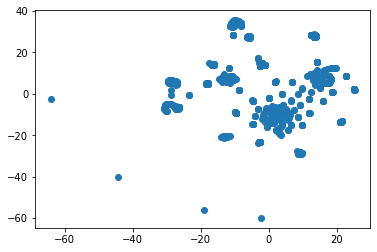

In [20]:
# visulize the clusters
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

In [21]:
# cluster analysis w/k-means
inertia =[]
k=list(range(1,11))

# calculate the inertia for the range of k values 
for i in k: 
    km = KMeans(n_clusters = i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve using hvPlot
elbow_data={"k": k, "inertia": inertia}
df_elbow =pd.DataFrame(elbow_data)
df_elbow.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,427242.391528
1,2,279794.304270
2,3,200670.383660
3,4,150148.945807
4,5,132766.569699


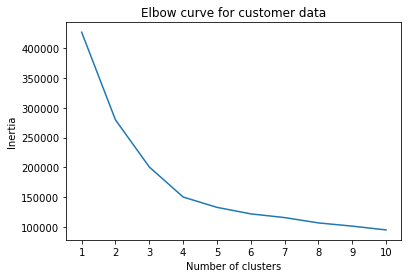

In [22]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Summary: The elbow curve shows the number of groups we should select is 4 where the inertia trajectory begins to change. 

The T-SNE feature plot and the K-Means elbow plot suggests a meaningful cluster in this dataset. An optimal point for K-Mean selection using the elbow plot would be 4. 